 ## 0. Подгрузка модулей

In [4]:
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Prosper Loan Dataset

[Ссылка на скачивание](https://www.kaggle.com/yousuf28/prosper-loan)

Отличие от других таблиц заключается в том, что здесь таргетом является категориальное значение статуса кредита.



## 1. Подгрузка данных

In [5]:
df = pd.read_csv("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[12] prosperLoanData.csv",
                  sep = ',')
df = df.rename(columns={'LoanStatus' :'target'})

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,target,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20



Выгружаем данные, вкидываем все идентиицирующие переменные из таблицы и записываем их названия, заменяем все булевые значения на 0 и 1.

In [6]:
df = df.drop(df.columns[[0, 1, 2, 6, 23, 24, 27, 50, 62, 64, 65, 66]], axis=1) 
trash_factors = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 'ClosedDate',
                 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine',
                 'LoanKey', 'LoanNumber','LoanOriginationDate', 'LoanOriginationQuarter',
                 'MemberKey']
for col in df.columns:
    df[col] = df[col].replace(True, 1)
    df[col] = df[col].replace(False, 0)

df.head()

,CreditGrade,Term,target,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,C,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,NaN,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,HR,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,NaN,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,NaN,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### 

In [7]:
s = ''
num_vals = []
cat_vals = []
i = 0
for col in df.columns:
    
    if type(df[col][0]) in [np.int64, np.float64] and len(df[col].unique()) > 2:
        type_x = 'numeric'
        values = '-'
        num_vals.append(col)
    elif type(df[col][0]) in [np.int64, np.float64] and len(df[col].unique()) == 2:
        type_x = 'binary'
        values = '-'
        num_vals.append(col)
    else:
        type_x = 'qualitative'
        values = df[col].unique()
        cat_vals.append(col)
    
    
    s += f'| {i} | {col} | {type_x} |  | {values[0]} |\n'
    for j in range(1, len(values)):
        s += f'|  |  |  |  | {values[j]} |\n'
    i += 1

## 2. Анализ факторов

### Список факторов

| No. | Attribute | Type | Description | Values (if qualitative)
| -:- | --- | --- | --- | ---
| 0 | CreditGrade | qualitative | - | C |
|  |  |  |  | HR |
|  |  |  |  | AA |
|  |  |  |  | D |
|  |  |  |  | B |
|  |  |  |  | E |
|  |  |  |  | A |
|  |  |  |  | NC |
| 1 | Term | numeric | Term | - |
| 2 | target | qualitative | Loan status | Completed |
|  |  |  |  | Current |
|  |  |  |  | Past Due (1-15 days) |
|  |  |  |  | Defaulted |
|  |  |  |  | Chargedoff |
|  |  |  |  | Past Due (16-30 days) |
|  |  |  |  | Cancelled |
|  |  |  |  | Past Due (61-90 days) |
|  |  |  |  | Past Due (31-60 days) |
|  |  |  |  | Past Due (91-120 days) |
|  |  |  |  | FinalPaymentInProgress |
|  |  |  |  | Past Due (>120 days) |
| 3 | BorrowerAPR | numeric | Borrower Annual Percentage Rate | - |
| 4 | BorrowerRate | numeric | Borrower Rate | - |
| 5 | LenderYield | numeric | Lender Yield | - |
| 6 | EstimatedEffectiveYield | numeric | Estimated Effective Yield | - |
| 7 | EstimatedLoss | numeric | Estimated Loss | - |
| 8 | EstimatedReturn | numeric | Estimated Return | - |
| 9 | ProsperRating (numeric) | numeric | Prosper Rating (numeric) | - |
| 10 | ProsperRating (Alpha) | qualitative | Prosper Rating (Alpha) | A |
|  |  |  |  | D |
|  |  |  |  | B |
|  |  |  |  | E |
|  |  |  |  | C |
|  |  |  |  | AA |
|  |  |  |  | HR |
| 11 | ProsperScore | numeric | Prosper Score | - |
| 12 | ListingCategory (numeric) | numeric | Listing Category (numeric) | - |
| 13 | BorrowerState | qualitative | Borrower State | CO |
|  |  |  |  | GA |
|  |  |  |  | MN |
|  |  |  |  | NM |
|  |  |  |  | KS |
|  |  |  |  | CA |
|  |  |  |  | IL |
|  |  |  |  | MD |
|  |  |  |  | AL |
|  |  |  |  | AZ |
|  |  |  |  | VA |
|  |  |  |  | FL |
|  |  |  |  | PA |
|  |  |  |  | OR |
|  |  |  |  | MI |
|  |  |  |  | NY |
|  |  |  |  | LA |
|  |  |  |  | WI |
|  |  |  |  | OH |
|  |  |  |  | NC |
|  |  |  |  | WA |
|  |  |  |  | NV |
|  |  |  |  | NJ |
|  |  |  |  | TX |
|  |  |  |  | AR |
|  |  |  |  | SC |
|  |  |  |  | DE |
|  |  |  |  | MO |
|  |  |  |  | NE |
|  |  |  |  | UT |
|  |  |  |  | DC |
|  |  |  |  | MA |
|  |  |  |  | CT |
|  |  |  |  | IN |
|  |  |  |  | KY |
|  |  |  |  | OK |
|  |  |  |  | MS |
|  |  |  |  | WV |
|  |  |  |  | RI |
|  |  |  |  | TN |
|  |  |  |  | ID |
|  |  |  |  | MT |
|  |  |  |  | HI |
|  |  |  |  | NH |
|  |  |  |  | VT |
|  |  |  |  | WY |
|  |  |  |  | ME |
|  |  |  |  | AK |
|  |  |  |  | IA |
|  |  |  |  | SD |
|  |  |  |  | ND |
| 14 | Occupation | qualitative | Occupation | Other |
|  |  |  |  | Professional |
|  |  |  |  | Skilled Labor |
|  |  |  |  | Executive |
|  |  |  |  | Sales - Retail |
|  |  |  |  | Laborer |
|  |  |  |  | Food Service |
|  |  |  |  | Fireman |
|  |  |  |  | Waiter/Waitress |
|  |  |  |  | Construction |
|  |  |  |  | Computer Programmer |
|  |  |  |  | Sales - Commission |
|  |  |  |  | Retail Management |
|  |  |  |  | Engineer - Mechanical |
|  |  |  |  | Military Enlisted |
|  |  |  |  | Clerical |
|  |  |  |  | Teacher |
|  |  |  |  | Clergy |
|  |  |  |  | Accountant/CPA |
|  |  |  |  | Attorney |
|  |  |  |  | Nurse (RN) |
|  |  |  |  | Analyst |
|  |  |  |  | Nurse's Aide |
|  |  |  |  | Investor |
|  |  |  |  | Realtor |
|  |  |  |  | Flight Attendant |
|  |  |  |  | Nurse (LPN) |
|  |  |  |  | Military Officer |
|  |  |  |  | Food Service Management |
|  |  |  |  | Truck Driver |
|  |  |  |  | Administrative Assistant |
|  |  |  |  | Police Officer/Correction Officer |
|  |  |  |  | Social Worker |
|  |  |  |  | Tradesman - Mechanic |
|  |  |  |  | Medical Technician |
|  |  |  |  | Professor |
|  |  |  |  | Postal Service |
|  |  |  |  | Civil Service |
|  |  |  |  | Pharmacist |
|  |  |  |  | Tradesman - Electrician |
|  |  |  |  | Scientist |
|  |  |  |  | Dentist |
|  |  |  |  | Engineer - Electrical |
|  |  |  |  | Architect |
|  |  |  |  | Landscaping |
|  |  |  |  | Tradesman - Carpenter |
|  |  |  |  | Bus Driver |
|  |  |  |  | Tradesman - Plumber |
|  |  |  |  | Engineer - Chemical |
|  |  |  |  | Doctor |
|  |  |  |  | Chemist |
|  |  |  |  | Student - College Senior |
|  |  |  |  | Principal |
|  |  |  |  | Teacher's Aide |
|  |  |  |  | Pilot - Private/Commercial |
|  |  |  |  | Religious |
|  |  |  |  | Homemaker |
|  |  |  |  | Student - College Graduate Student |
|  |  |  |  | Student - Technical School |
|  |  |  |  | Psychologist |
|  |  |  |  | Biologist |
|  |  |  |  | Student - College Sophomore |
|  |  |  |  | Judge |
|  |  |  |  | Student - College Junior |
|  |  |  |  | Car Dealer |
|  |  |  |  | Student - Community College |
|  |  |  |  | Student - College Freshman |
| 15 | EmploymentStatus | qualitative | Employment Status | Self-employed |
|  |  |  |  | Employed |
|  |  |  |  | Not available |
|  |  |  |  | Full-time |
|  |  |  |  | Other |
|  |  |  |  | Not employed |
|  |  |  |  | Part-time |
|  |  |  |  | Retired |
| 16 | EmploymentStatusDuration | numeric | Employment Status Duration | - |
| 17 | IsBorrowerHomeowner | binary | Is Borrower Homeowner | - |
| 18 | CurrentlyInGroup | binary | Currently In Group | - |
| 19 | CreditScoreRangeLower | numeric | Credit Score Range Lower | - |
| 20 | CreditScoreRangeUpper | numeric | Credit Score Range Upper | - |
| 21 | CurrentCreditLines | numeric | Current Credit Lines | - |
| 22 | OpenCreditLines | numeric | Open Credit Lines | - |
| 23 | TotalCreditLinespast7years | numeric | Total Credit Lines past 7years | - |
| 24 | OpenRevolvingAccounts | numeric | Open Revolving Accounts | - |
| 25 | OpenRevolvingMonthlyPayment | numeric | Open Revolving Monthly Payment | - |
| 26 | InquiriesLast6Months | numeric | Inquiries Last 6 Months | - |
| 27 | TotalInquiries | numeric | Total Inquiries | - |
| 28 | CurrentDelinquencies | numeric | Current Delinquencies | - |
| 29 | AmountDelinquent | numeric | Amount Delinquent | - |
| 30 | DelinquenciesLast7Years | numeric | Delinquencies Last 7 Years | - |
| 31 | PublicRecordsLast10Years | numeric | Public Records Last 10 Years | - |
| 32 | PublicRecordsLast12Months | numeric | Public Records Last 12 Months | - |
| 33 | RevolvingCreditBalance | numeric | Revolving Credit Balance | - |
| 34 | BankcardUtilization | numeric | Bankcard Utilization | - |
| 35 | AvailableBankcardCredit | numeric | Available Bankcard Credit | - |
| 36 | TotalTrades | numeric | Total Trades | - |
| 37 | TradesNeverDelinquent (percentage) | numeric | Trades Never Delinquent | - |
| 38 | TradesOpenedLast6Months | numeric | Trades Opened Last 6 Months | - |
| 39 | DebtToIncomeRatio | numeric | Debt To Income Ratio | - |
| 40 | IncomeRange | qualitative | Income Range | 25,000-49,999 |
|  |  |  |  | 50,000-74,999 |
|  |  |  |  | Not displayed |
|  |  |  |  | 100,000+ |
|  |  |  |  | 75,000-99,999 |
|  |  |  |  | 1-24,999 |
|  |  |  |  | Not employed |
|  |  |  |  | 0 |
| 41 | IncomeVerifiable | binary | Income Verifiable | - |
| 42 | StatedMonthlyIncome | numeric | Stated Monthly Income | - |
| 43 | TotalProsperLoans | numeric | Total Prosper Loans | - |
| 44 | TotalProsperPaymentsBilled | numeric | Total Prosper Payments Billed | - |
| 45 | OnTimeProsperPayments | numeric | On Time Prosper Payments | - |
| 46 | ProsperPaymentsLessThanOneMonthLate | numeric | Prosper Payments Less Than One Month Late | - |
| 47 | ProsperPaymentsOneMonthPlusLate | numeric | Prosper Payments One Month Plus Late | - |
| 48 | ProsperPrincipalBorrowed | numeric | Prosper Principal Borrowed | - |
| 49 | ProsperPrincipalOutstanding | numeric | Prosper Principal Outstanding | - |
| 50 | ScorexChangeAtTimeOfListing | numeric | Scorex Change At Time Of Listing | - |
| 51 | LoanCurrentDaysDelinquent | numeric | Loan Current Days Delinquent | - |
| 52 | LoanFirstDefaultedCycleNumber | numeric | Loan First Defaulted Cycle Number | - |
| 53 | LoanMonthsSinceOrigination | numeric | Loan Months Since Origination | - |
| 54 | LoanOriginalAmount | numeric | Loan Original Amount | - |
| 55 | MonthlyLoanPayment | numeric | Monthly Loan Payment | - |
| 56 | LP_CustomerPayments | numeric | LP Customer Payments | - |
| 57 | LP_CustomerPrincipalPayments | numeric | LP Customer Principal Payments | - |
| 58 | LP_InterestandFees | numeric | LP Interestand Fees | - |
| 59 | LP_ServiceFees | numeric | LP Service Fees | - |
| 60 | LP_CollectionFees | numeric | LP Collection Fees | - |
| 61 | LP_GrossPrincipalLoss | numeric | LP Gros Principa Loss | - |
| 62 | LP_NetPrincipalLoss | numeric | LP Net Principal Loss | - |
| 63 | LP_NonPrincipalRecoverypayments | numeric | LP_Non Principal Recovery payments | - |
| 64 | PercentFunded | numeric | Percent Funded | - |
| 65 | Recommendations | numeric |  | - |
| 66 | InvestmentFromFriendsCount | numeric | Investment From Friends Count | - |
| 67 | InvestmentFromFriendsAmount | numeric | Investment From Friends Amount | - |
| 68 | Investors | numeric |  | - |

In [10]:
X = df.loc[:, df.columns != 'target']
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# Save data & info ===
# parquet is optimized for large volumes of data
!mkdir Users/vaneque/Desktop/L'ecole /Model risks/Data/
X_train.to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[12]  Prosper/X_train.parquet")
X_test.to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[12]  Prosper/X_test.parquet")
# переводим pd.Series в pd.DataFrame для удобного экспорта
pd.DataFrame(y_train).to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[12]  Prosper/y_train.parquet")
pd.DataFrame(y_test).to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[12]  Prosper/y_test.parquet")

# сохраняем списки категориальных и колич. переменных
cat_vals = cat_vals

num_vals = num_vals

with open("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[12]  Prosper/factors.json", 'w') as f:
    json.dump({'cat_vals': cat_vals, 'num_vals': num_vals, 'trash' : trash_factors}, f)

zsh:1: unmatched '


## 3. Статистики и пропуски

### Статистики

In [ ]:
print(f'Количество наблюдений: {X.shape[0]}')
print(f'Количество факторов: {X.shape[1]}')
print(f'Количество целевых событий:',sum(df['target'] == 'Defaulted'))
print('Доля целевых событий:', str(np.round(sum(df['target'] == 'Defaulted') / X.shape[0] * 100, 2)), '%')

### Пропуски


In [ ]:
for col in X.columns:
    print(f'Количество пропусков по фактору {col}:\n\t{X[col].isna().sum()} или {(X[col].isna().sum() / df.shape[0] * 100):.2f}%')

## 4. Визуальный анализ и выбросы

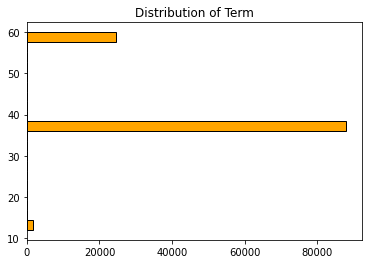

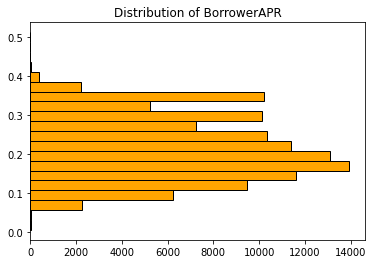

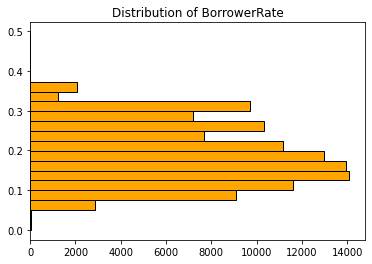

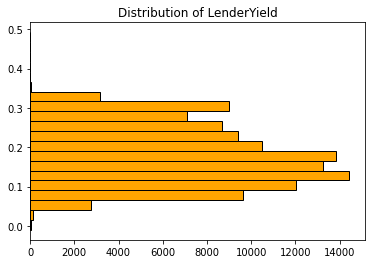

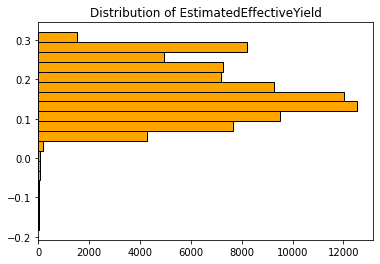

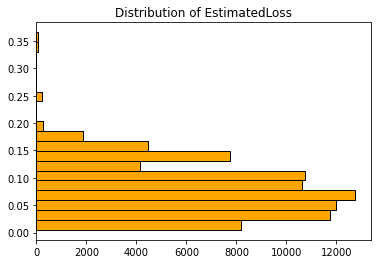

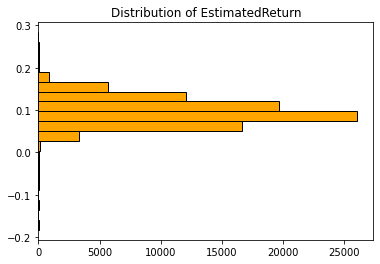

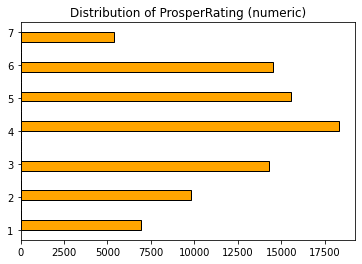

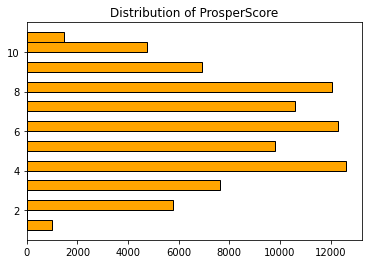

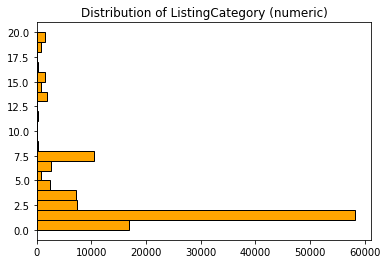

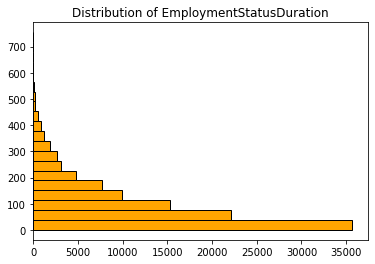

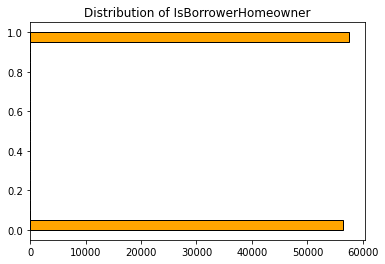

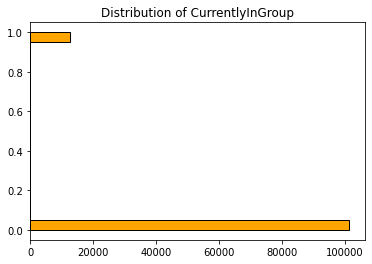

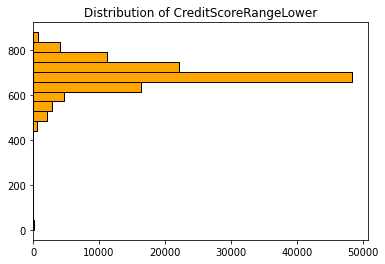

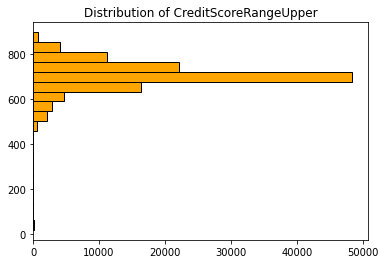

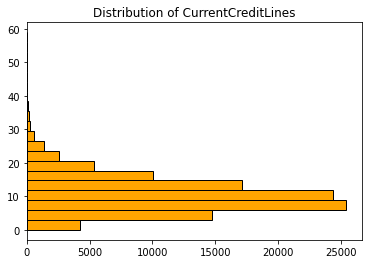

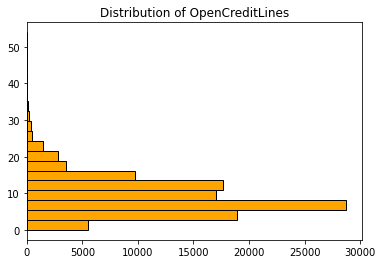

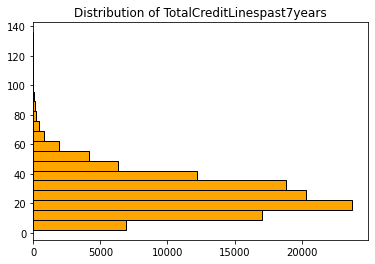

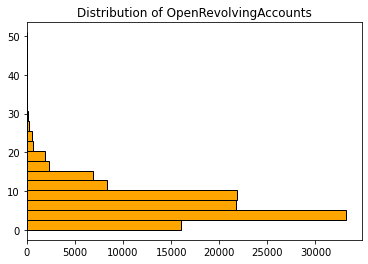

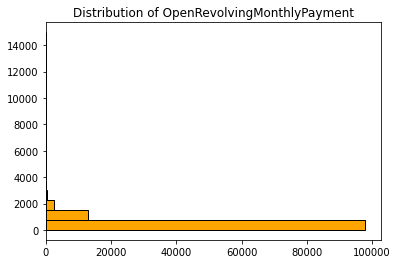

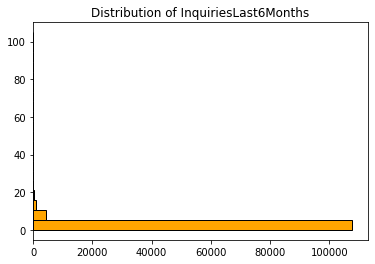

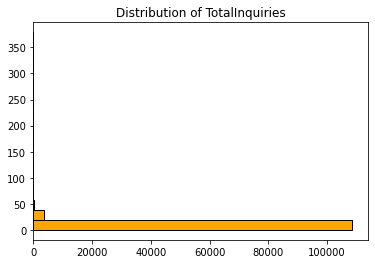

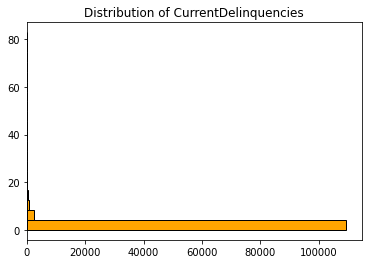

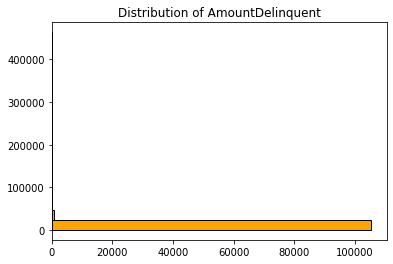

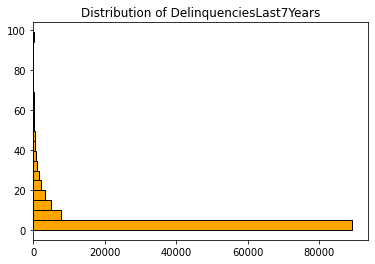

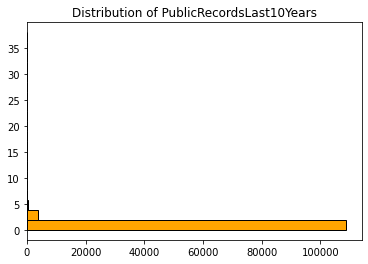

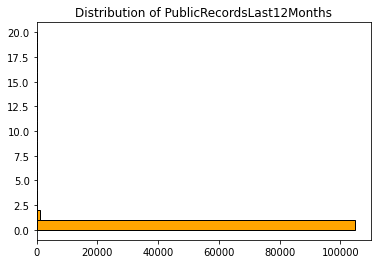

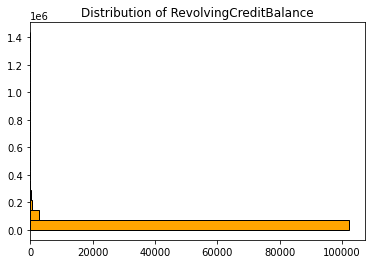

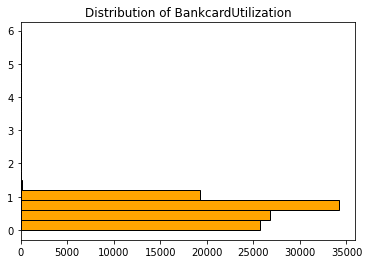

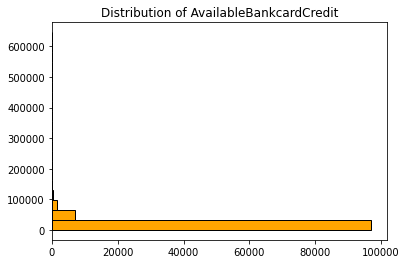

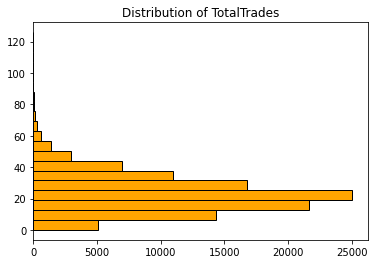

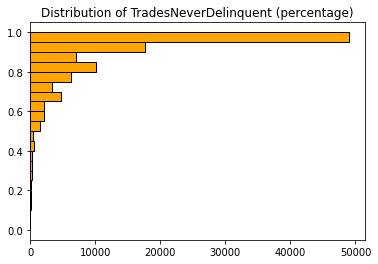

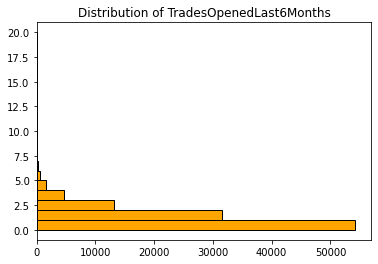

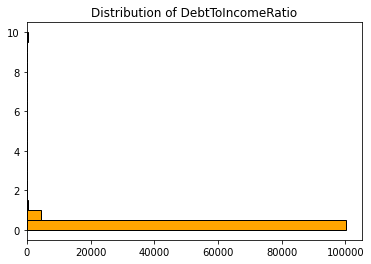

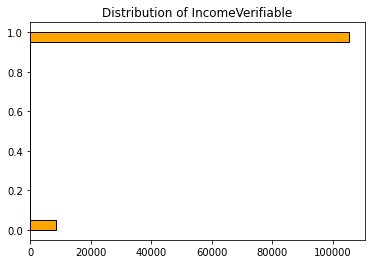

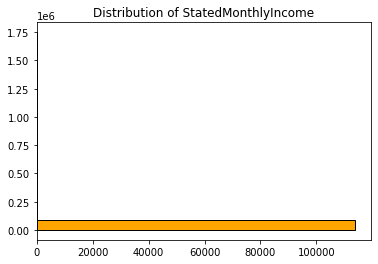

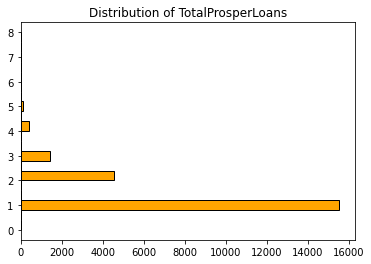

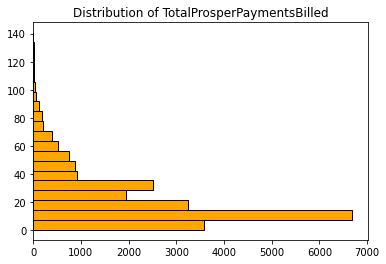

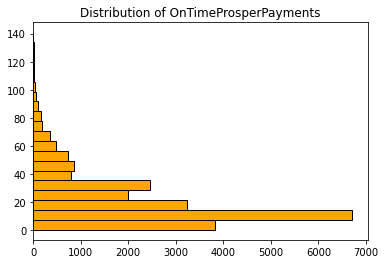

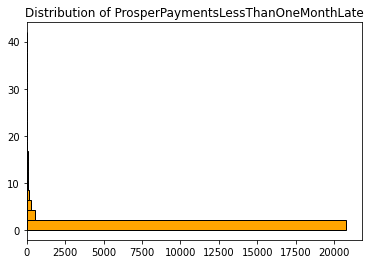

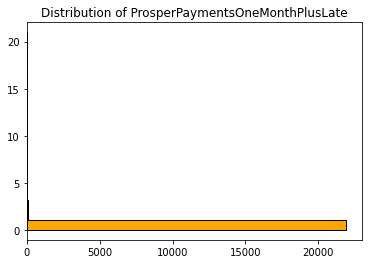

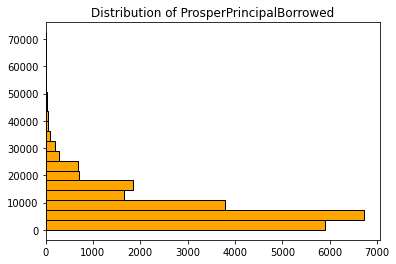

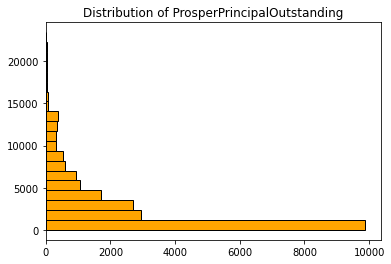

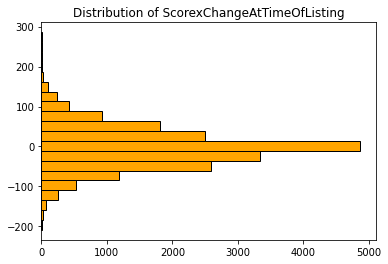

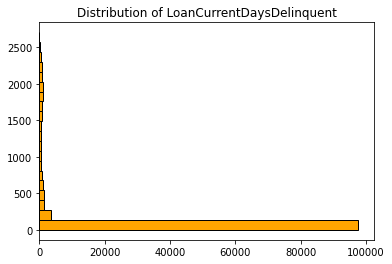

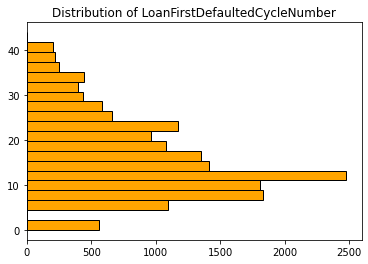

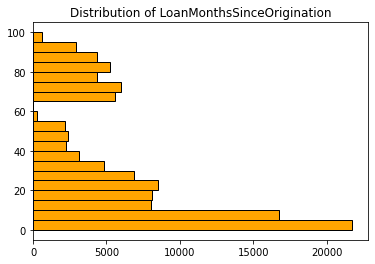

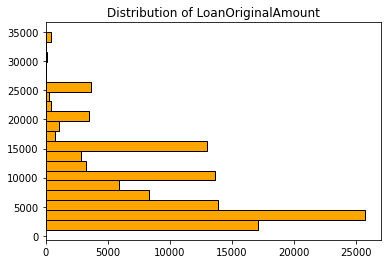

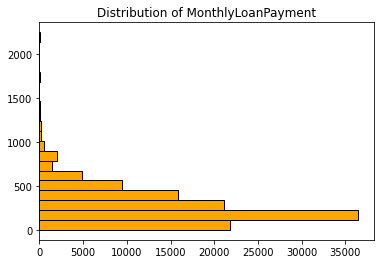

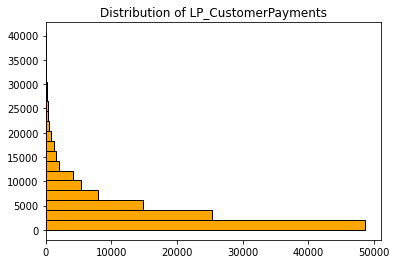

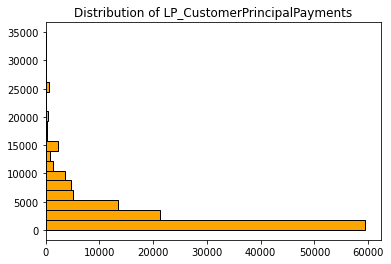

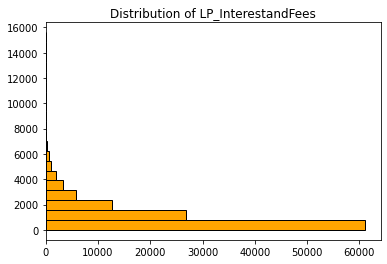

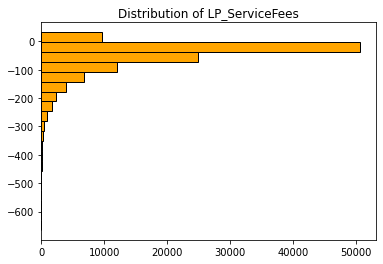

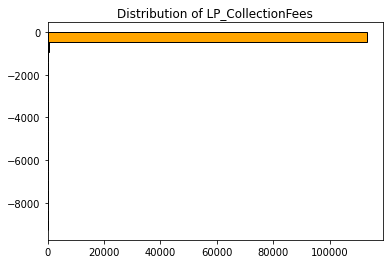

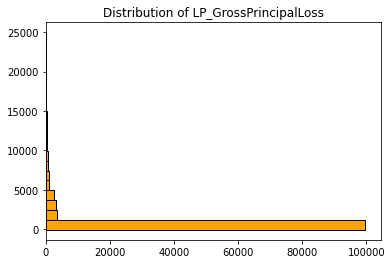

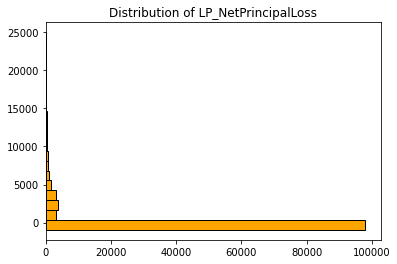

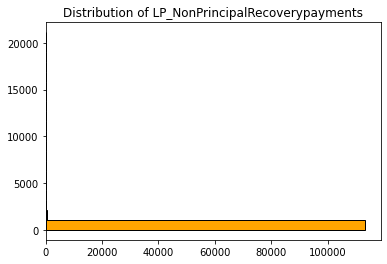

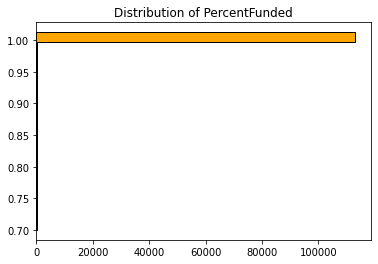

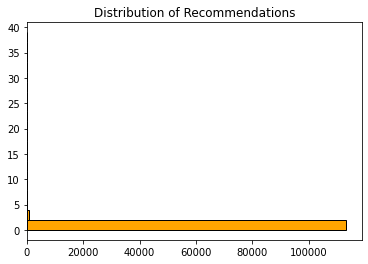

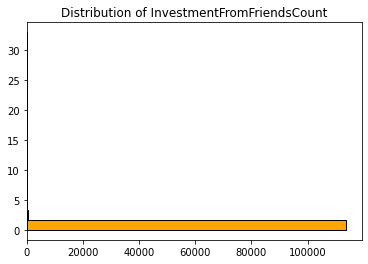

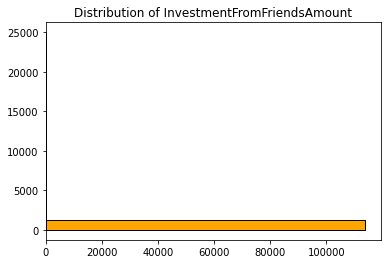

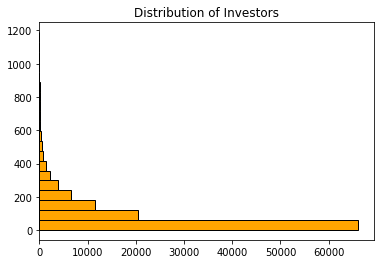

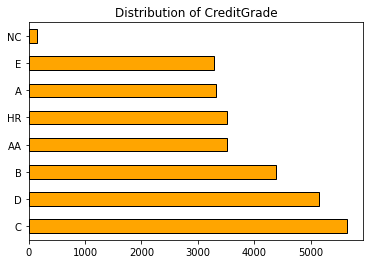

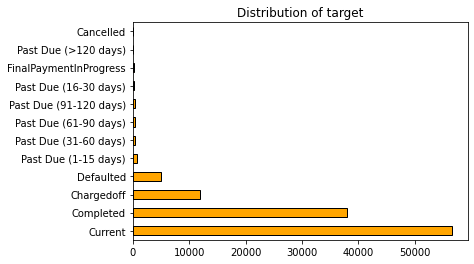

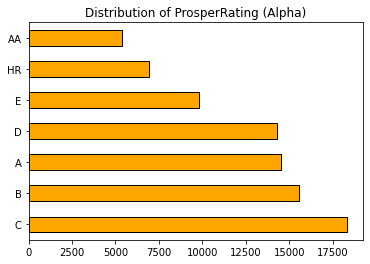

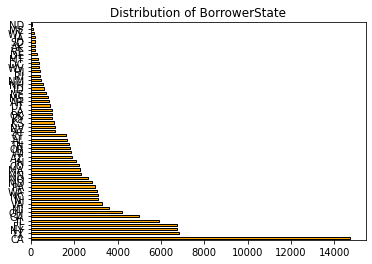

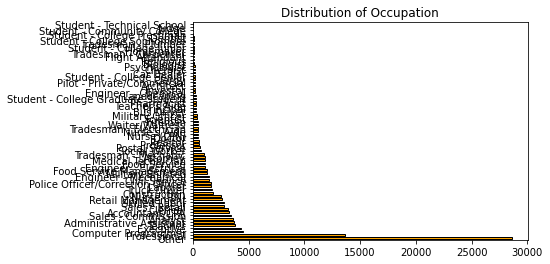

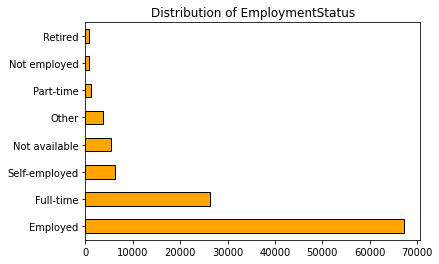

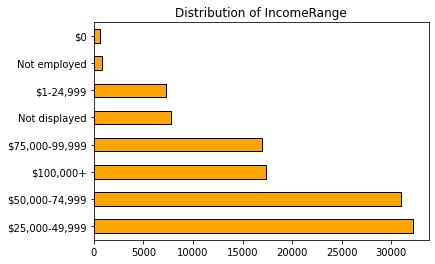

In [9]:
for col in num_vals:
    plt.hist(X[col], color='orange', ec='black', orientation = 'horizontal', bins = 20)
    plt.title(f'Distribution of {col}')
    plt.show()
for col in cat_vals:
    df[col].value_counts().plot.barh(color='orange', ec='black' , orientation='horizontal')
    plt.title(f'Distribution of {col}')
    plt.show()

Очевидно, факторы LP_GrossPrincipalLoss и LP_NetPrincipalLoss, PercentFunded содержат выбросы,

### Выводы

Датасет с большим количеством записей и факторов. Доля целевых значений достаточно низка, по некоторым факторам количество пропусков достигает 80%. 